# EDA

In [260]:
# We import the libraries we'll need for the project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st 
from scipy.stats import levene

In [112]:
# We load our dataset

games = pd.read_csv('../data/games.csv')

In [113]:
# we print the first five rows
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [114]:
# We print the info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [115]:
# we print some summary statistics
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [116]:
games.Name.duplicated().sum()

5155

**Initial Observations**
- We have a dataset with 11 columns and 16715 entries. 
- We have some columns with missing data. 
- The `use_score` dtype is incorrect. We need to change it
- We have 7 numerical variables and 4 categorical variables. 
- We have some games duplicated. However, this is normal as we have the same video game in multiple platforms.
- We have 31 platforms. However, we may have some duplicates.
- We have information from 1980 till 2016. We'll decide if all of that information is needed or not. 
- We have 12 genres and 8 ratings

**Next steps**
- We'll perform a missing value analysis.
- We'll perform an ourliers analysis.

## Duplicated Values

In [117]:
# we'll lowercase all column names to better handling
games.columns = [column.lower() for column in games.columns]
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [118]:
cathegorical_columns = ['platform','genre','rating']
for column in cathegorical_columns:
    print(games[column].unique())
    print()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



## Missing Values

In [119]:
# We create a function that will help us replace missing values
def replace(row,column_1,column_2,new_df,column_3 = None):
    missing = row[column_1]
    new_value = row[column_2]

    if column_3 != None:
        addtional = row[column_3]
        if pd.isna(missing):
            try:
                return new_df[column_1][addtional][new_value]
            except:
                return None
        else:
            return missing

    else:
        if pd.isna(missing):
            try:
                return new_df[column_1][new_value]
            except:
                return None
        else:
            return missing

In [120]:
# We create a list with the columns with missing values 
missing_value_columns = [column for column in games.columns if games[column].isna().sum() > 0]
missing_value_columns

['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

In [121]:
# We print the percentage of missing values per column
for column in missing_value_columns:
    percentage_ = "{:.2%}".format(games[column].isna().sum() / games.shape[0])
    print(f'{column.upper()} missing value percentage: {percentage_}')
    print()

NAME missing value percentage: 0.01%

YEAR_OF_RELEASE missing value percentage: 1.61%

GENRE missing value percentage: 0.01%

CRITIC_SCORE missing value percentage: 51.32%

USER_SCORE missing value percentage: 40.09%

RATING missing value percentage: 40.48%



**Observations**

- We have six columns with missing info
- We have three of them with a max of 1.61% of missing data
- The other three have over 40% of missing data. 
- We will eliminate the rows with missing data from the first three columns and will analyze how to fill the missing values on the other columns. 

In [122]:
# we eliminate the rows with missing values for the first three columns
for column in missing_value_columns[0:3]:
    games.dropna(subset=[column],inplace=True)


In [123]:
# We check all the missing values were eliminated 
for column in missing_value_columns[0:3]:
    percentage_ = "{:.2%}".format(games[column].isna().sum() / games.shape[0])
    print(f'{column.upper()} missing value percentage: {percentage_}')

NAME missing value percentage: 0.00%
YEAR_OF_RELEASE missing value percentage: 0.00%
GENRE missing value percentage: 0.00%


### `critic_score`

Our first apporach will be to fill all missing values with the name of the video game and its `critic_score` from another plaform. We'll check if that reasoning is appropiate for the dataset.

In [124]:
# We print the rows with the name of a specific game 
games[games['name'] == games.name[np.random.randint(0,16000)]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8851,Space Station Silicon Valley,N64,1997.0,Adventure,0.12,0.03,0.0,0.0,NaN,NaN,NaN


In [125]:
# We print another example
games[games['name'] == games.name[np.random.randint(0,16000)]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2550,Final Fantasy XI: Wings of the Goddess,PS2,2007.0,Role-Playing,0.35,0.27,0.09,0.09,NaN,tbd,T
5879,Final Fantasy XI: Wings of the Goddess,X360,2007.0,Role-Playing,0.26,0.00,0.02,0.02,63.0,5.8,T


In [126]:
# We print another example
games[games['name'] == games.name[np.random.randint(0,16000)]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5385,Fantastic Voyage,2600,1981.0,Action,0.32,0.02,0.0,0.0,NaN,NaN,NaN


In [127]:
# We print another example
games[games['name'] == games.name[np.random.randint(0,16000)]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1303,Super Monkey Ball,GC,2001.0,Puzzle,0.95,0.37,0.1,0.04,87.0,7.9,E


**Observations**

From four examples we se that only two of them will help us fill our `critic_score` missing values. That means that this will not work for all our missing values. We will make the replacement and see the percetage of missing values we still have. 

In [128]:
# We create a new dataframe with the criteria will use for the replacement of values
critic_score_replace = games.dropna(subset='critic_score').pivot_table(index='name',values='critic_score')
critic_score_replace.head()

,critic_score
name,
Tales of Xillia 2,71.0
.hack//Infection Part 1,75.0
.hack//Mutation Part 2,76.0
.hack//Outbreak Part 3,70.0
007 Racing,51.0


In [129]:
# We make the replacement
games.critic_score = games.apply(replace,args=('critic_score','name',critic_score_replace),axis=1)

# We print the percentage of missing valus in this column

"{:.2%}".format(games.critic_score.isna().sum() / games.shape[0])

'45.74%'

We see that we still have a lot of missing values on this column. Since we don't have enough information of how `critic_score` is calculated or assigned to each game, we'll fill our missing values calculating the median score of platform and genre. 

In [130]:
# We create the new table for replacement
critic_score_replace_2 = games.dropna(subset='critic_score').pivot_table(
    index=['platform','genre'],values='critic_score',aggfunc='median')
critic_score_replace_2

critic_score
platform genre                     
2600     Action           87.000000
         Misc             69.333333
         Shooter          61.500000
3DS      Action           65.000000
         Adventure        62.000000
...                             ...
XOne     Role-Playing     87.000000
         Shooter          80.000000
         Simulation       59.000000
         Sports           75.250000
         Strategy         70.000000

[230 rows x 1 columns]

In [131]:
# We use our function to replace the missing values
games.critic_score = games.apply(replace,args=('critic_score','genre',critic_score_replace_2,'platform'),axis=1)

# We print the percentage of missing valus in this column
"{:.2%}".format(games.critic_score.isna().sum() / games.shape[0])

'2.30%'

We have lowered the percentage of missing values to 2.30%. Now we'll chage this missing values to np.nan to change the dtype to float.

In [132]:
# We replace with np.nan
games.fillna({'critic_score':np.nan},inplace=True)

In [133]:
games.critic_score.info()

<class 'pandas.core.series.Series'>
Index: 16444 entries, 0 to 16714
Series name: critic_score
Non-Null Count  Dtype  
--------------  -----  
16065 non-null  float64
dtypes: float64(1)
memory usage: 773.0 KB


### `user_score`

We'll follow the same first apporach we followed with `critic_score`. 

In [134]:
# We replace with np.nan
games.fillna({'user_score':np.nan},inplace=True)

# We change the dtype to float
try:
    games.user_score = games.user_score.astype('float')
except:
    print('Unable to convert')

Unable to convert


In [135]:
# We look for unique values to see if there is anything that prevent us from making the change
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [136]:
# We replace tbd with np.nan
games[games['user_score'] == 'tbd'] = np.nan

# We change dtype to float
games.user_score = games.user_score.astype('float')

With that change we can proceed to create our new table to replace missing values 

In [137]:
# We create our new table to replace missing values 
user_score_replace = games.dropna(subset='user_score').pivot_table(index='name',values='user_score',aggfunc='median')
user_score_replace

,user_score
name,
Tales of Xillia 2,7.90
.hack//Infection Part 1,8.50
.hack//Mutation Part 2,8.90
.hack//Outbreak Part 3,8.70
007 Racing,4.60
...,...
inFAMOUS 2,8.40
inFAMOUS: Second Son,7.90
nail'd,6.65


In [138]:
# We make the replacement
games.user_score = games.apply(replace,args=('user_score','name',user_score_replace),axis=1)

# We print the percentage of missing valus in this column
"{:.2%}".format(games.user_score.isna().sum() / games.shape[0])

'52.60%'

Our percetage of missing values on our `user_score` variable goes from 40% to 50% even after making the replacement. This is because we replaced the tbt values with NaNs. Now we'll use the same razoning we used on `critic_score` to replace the remaining missing values on this column

In [139]:
# We create the new dataframe

user_score_replace_2 = games.dropna(subset='user_score').pivot_table(
    index=['platform','genre'],values='user_score',aggfunc='median')

user_score_replace_2

user_score
platform genre                   
2600     Action              9.00
         Misc                7.80
         Shooter             7.00
3DS      Action              6.60
         Adventure           7.40
...                           ...
XOne     Role-Playing        7.40
         Shooter             6.75
         Simulation          6.30
         Sports              5.90
         Strategy            7.50

[229 rows x 1 columns]

In [140]:
# We replace the missing values
games.user_score = games.apply(replace,args=('user_score','genre',user_score_replace_2,'platform'),axis=1)

# We print the percentage of missing valus in this column
"{:.2%}".format(games.user_score.isna().sum() / games.shape[0])

'16.93%'

### `rating`

We'll do the same we've been doing with the other columns to replace the missing values on this column. 

In [141]:
# We create a new dataframe to replcae the missing values
rating_replace = games.pivot_table(index='name',values='rating',aggfunc=pd.Series.mode)
rating_replace

,rating
name,
Beyblade Burst,[]
Fire Emblem Fates,[]
Frozen: Olaf's Quest,[]
Haikyu!! Cross Team Match!,[]
Tales of Xillia 2,T
...,...
nail'd,E10+
pro evolution soccer 2011,E
th!nk Logic Trainer,[]


As we can see, we have more than one mode on some rows. That won't work with our replacement function. We'll need to create a function that gives us only one mode per row.

In [142]:
# We create the function
def get_one_mode(series):
    mode_values = series.mode()
    if not mode_values.empty:
        return mode_values.iloc[0]
    else:
        return None
    
# We create the pivot table using the funcion
rating_replace_ = games.pivot_table(index='name',values='rating',aggfunc=get_one_mode)
rating_replace_

,rating
name,
Tales of Xillia 2,T
.hack//Infection Part 1,T
.hack//Mutation Part 2,T
.hack//Outbreak Part 3,T
007 Racing,T
...,...
inFAMOUS 2,T
inFAMOUS: Second Son,T
nail'd,E10+


Now we have the pivot table ready to make the replacement

In [143]:
# We make the replacement
games.rating = games.apply(replace,args=('rating','name',rating_replace_),axis=1)

# We print the percentage of missing valus in this column
"{:.2%}".format(games.rating.isna().sum() / games.shape[0])

'52.67%'

We can see that we still have many missing values. To complete this we'll create a new pivot table with the mode by genre. 

In [144]:
# We create the new table using the get_one_mode function
rating_replace_1 = games.pivot_table(index='genre',values='rating',aggfunc=get_one_mode)
rating_replace_1

,rating
genre,
Action,T
Adventure,M
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


In [145]:
# We make the replacement
games.rating = games.apply(replace,args=('rating','genre',rating_replace_1),axis=1)

# We check the percentage of missing values
'{:.2%}'.format(games.rating.isna().sum() / games.shape[0])

'14.45%'

Now that we have lowered the amount of missing values on each column, we'll continue with our analysis

## Outliers

In [146]:
# We create a list of numerical columns for the ouliers' analysis
numerical_columns = set(games.columns.drop('name')) - set(cathegorical_columns)
numerical_columns

{'critic_score',
 'eu_sales',
 'jp_sales',
 'na_sales',
 'other_sales',
 'user_score',
 'year_of_release'}

In [147]:
# Creamos una función que nos ayudara a analizar los outsiders de cada conjunto de datos

def outliers(df,col,ylabel=None):
    df.boxplot(col,figsize=(8,5))
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'''
El IQR de {col} es {IQR}

EL limite inferior de nuestro boxplot es {low_limit}

La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}

El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}

'EL limite superior es de nuestro boxplot es {up_limit}
          
La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}
          
El porcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}
''')

### `eu_sales`

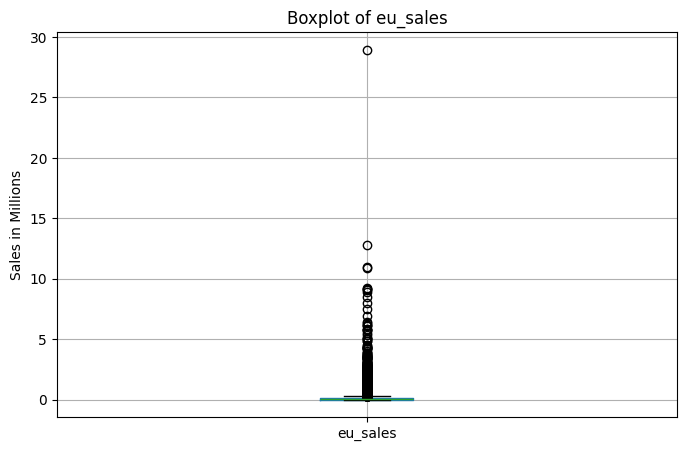

count    14068.000000
mean         0.163201
std          0.544008
min          0.000000
25%          0.000000
50%          0.030000
75%          0.130000
max         28.960000
Name: eu_sales, dtype: float64


El IQR de eu_sales es 0.13

EL limite inferior de nuestro boxplot es -0.13

La cantidad de valores iguales o menores a -0.13 es 0

El porcentaje de valores iguales o menores a -0.13 es 0.00%

'EL limite superior es de nuestro boxplot es 0.26
          
La cantidad de volores iguales o superiores a 0.26 es 2096
          
El porcentaje de valores iguales o superiores a 0.26 es 12.75%



In [148]:
outliers(games,'eu_sales','Sales in Millions')

### `jp_sales`

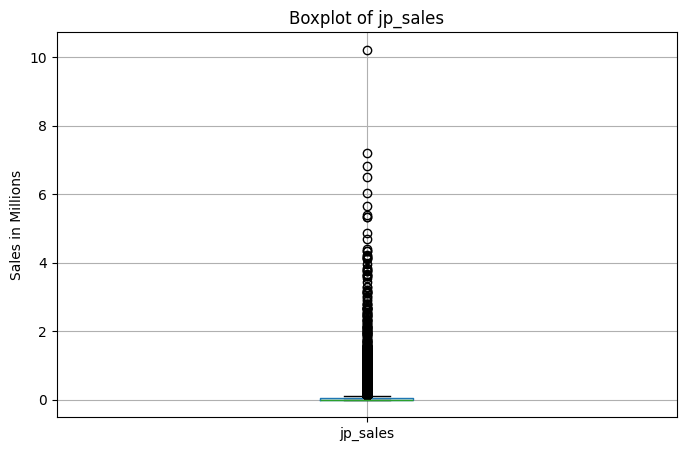

count    14068.000000
mean         0.091273
std          0.334487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max         10.220000
Name: jp_sales, dtype: float64


El IQR de jp_sales es 0.05

EL limite inferior de nuestro boxplot es -0.05

La cantidad de valores iguales o menores a -0.05 es 0

El porcentaje de valores iguales o menores a -0.05 es 0.00%

'EL limite superior es de nuestro boxplot es 0.1
          
La cantidad de volores iguales o superiores a 0.1 es 2548
          
El porcentaje de valores iguales o superiores a 0.1 es 15.50%



In [149]:
outliers(games,'jp_sales','Sales in Millions')

### `na_sales`

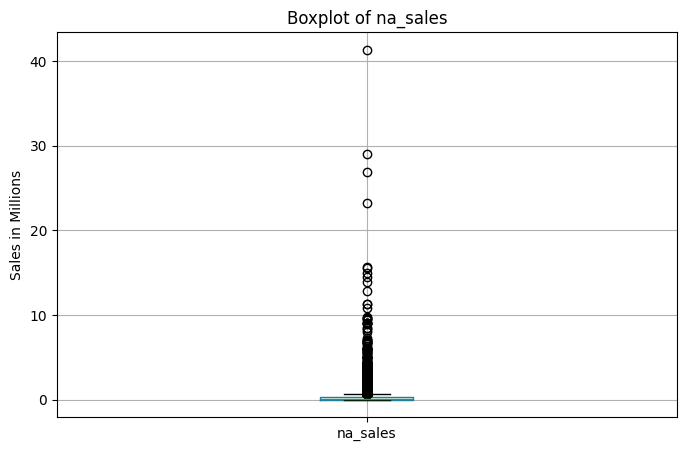

count    14068.000000
mean         0.287400
std          0.879667
min          0.000000
25%          0.000000
50%          0.080000
75%          0.260000
max         41.360000
Name: na_sales, dtype: float64


El IQR de na_sales es 0.26

EL limite inferior de nuestro boxplot es -0.26

La cantidad de valores iguales o menores a -0.26 es 0

El porcentaje de valores iguales o menores a -0.26 es 0.00%

'EL limite superior es de nuestro boxplot es 0.52
          
La cantidad de volores iguales o superiores a 0.52 es 1899
          
El porcentaje de valores iguales o superiores a 0.52 es 11.55%



In [150]:
outliers(games,'na_sales','Sales in Millions')

## `other_sales`

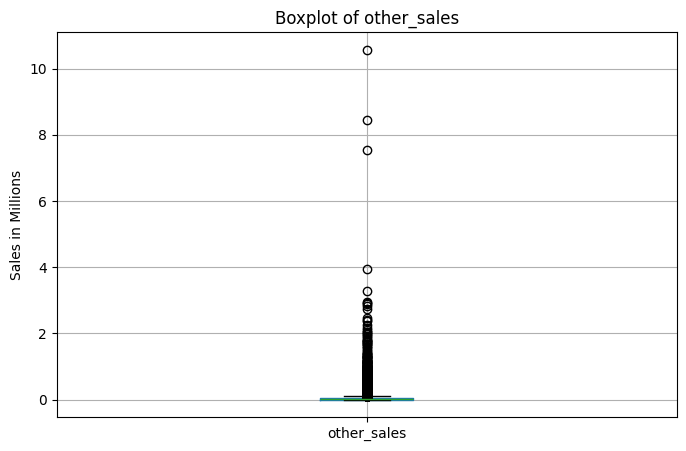

count    14068.000000
mean         0.052946
std          0.202128
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: other_sales, dtype: float64


El IQR de other_sales es 0.04

EL limite inferior de nuestro boxplot es -0.04

La cantidad de valores iguales o menores a -0.04 es 0

El porcentaje de valores iguales o menores a -0.04 es 0.00%

'EL limite superior es de nuestro boxplot es 0.08
          
La cantidad de volores iguales o superiores a 0.08 es 2128
          
El porcentaje de valores iguales o superiores a 0.08 es 12.94%



In [151]:
outliers(games,'other_sales','Sales in Millions')

**Observations**

We have analize sales columns to better understand their distrubution and look for ouliers. We see that all variables have outliers poiting to the upper section of our boxplots. That meas all of our sales valriables are positive skewed. That also means that we have some games with high sales numbers and that's why our grahps look like that. 

Even though we have ecounter some ouliers that doesn't mean there is something wrong with the data. We won't make any changes to this variables

### `critic_score`

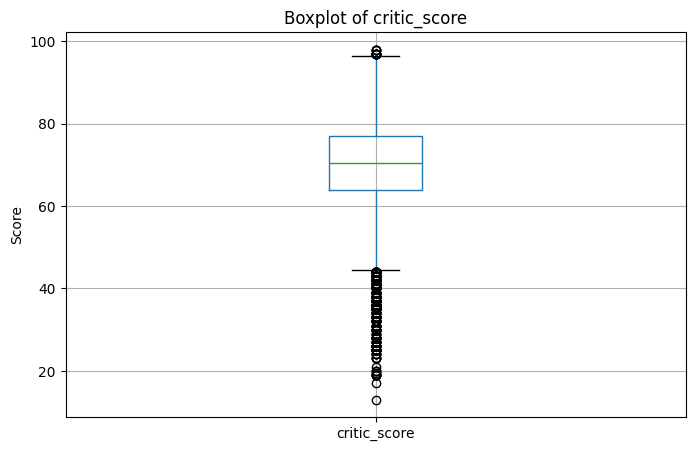

count    13689.000000
mean        69.878335
std         11.346732
min         13.000000
25%         64.000000
50%         70.500000
75%         77.000000
max         98.000000
Name: critic_score, dtype: float64


El IQR de critic_score es 13.0

EL limite inferior de nuestro boxplot es 51.0

La cantidad de valores iguales o menores a 51.0 es 858

El porcentaje de valores iguales o menores a 51.0 es 5.22%

'EL limite superior es de nuestro boxplot es 90.0
          
La cantidad de volores iguales o superiores a 90.0 es 452
          
El porcentaje de valores iguales o superiores a 90.0 es 2.75%



In [152]:
outliers(games,'critic_score','Score')

### `user_score`

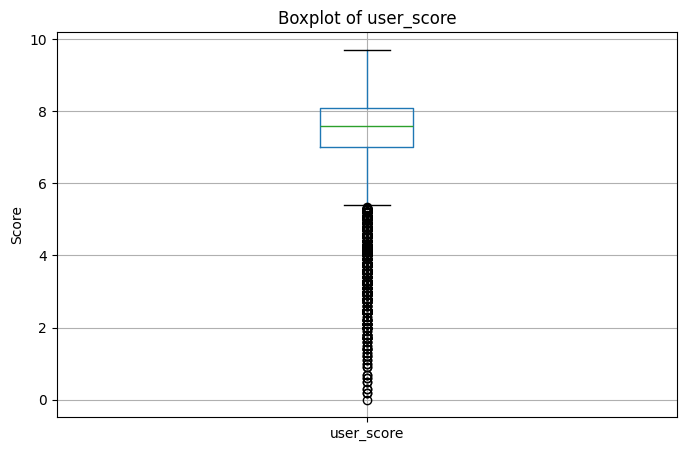

count    13660.000000
mean         7.334123
std          1.230883
min          0.000000
25%          7.000000
50%          7.600000
75%          8.100000
max          9.700000
Name: user_score, dtype: float64


El IQR de user_score es 1.0999999999999996

EL limite inferior de nuestro boxplot es 5.9

La cantidad de valores iguales o menores a 5.9 es 1479

El porcentaje de valores iguales o menores a 5.9 es 8.99%

'EL limite superior es de nuestro boxplot es 9.2
          
La cantidad de volores iguales o superiores a 9.2 es 115
          
El porcentaje de valores iguales o superiores a 9.2 es 0.70%



In [153]:
outliers(games,'user_score','Score')

### `year_of_release`

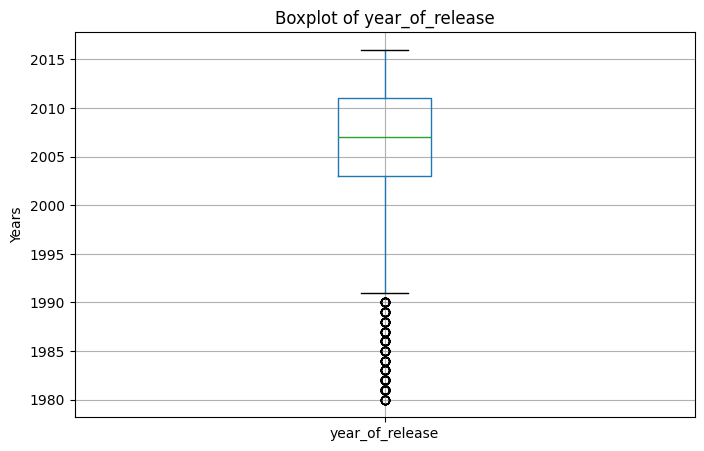

count    14068.000000
mean      2006.323429
std          6.174107
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64


El IQR de year_of_release es 8.0

EL limite inferior de nuestro boxplot es 1995.0

La cantidad de valores iguales o menores a 1995.0 es 705

El porcentaje de valores iguales o menores a 1995.0 es 4.29%

'EL limite superior es de nuestro boxplot es 2019.0
          
La cantidad de volores iguales o superiores a 2019.0 es 0
          
El porcentaje de valores iguales o superiores a 2019.0 es 0.00%



In [154]:
outliers(games,'year_of_release','Years')

**Observations**

We can observe that these three variables also have ouliers. `critic_score` and `user_score` have both positive and negaive outliers while `year_of_release` has only postivie ouliers. However, if we review the description of each variable, we see that the range of values on each variable is correct. If we check the description of `critic_score`, we see that the min value is 13 and the max value is 98. And as we know, the range of that variable is 1-100. We can see this same situation being repeated on each one of these three variables. 

We won't make any changes. 

# Analysis
## Number of games launched per year

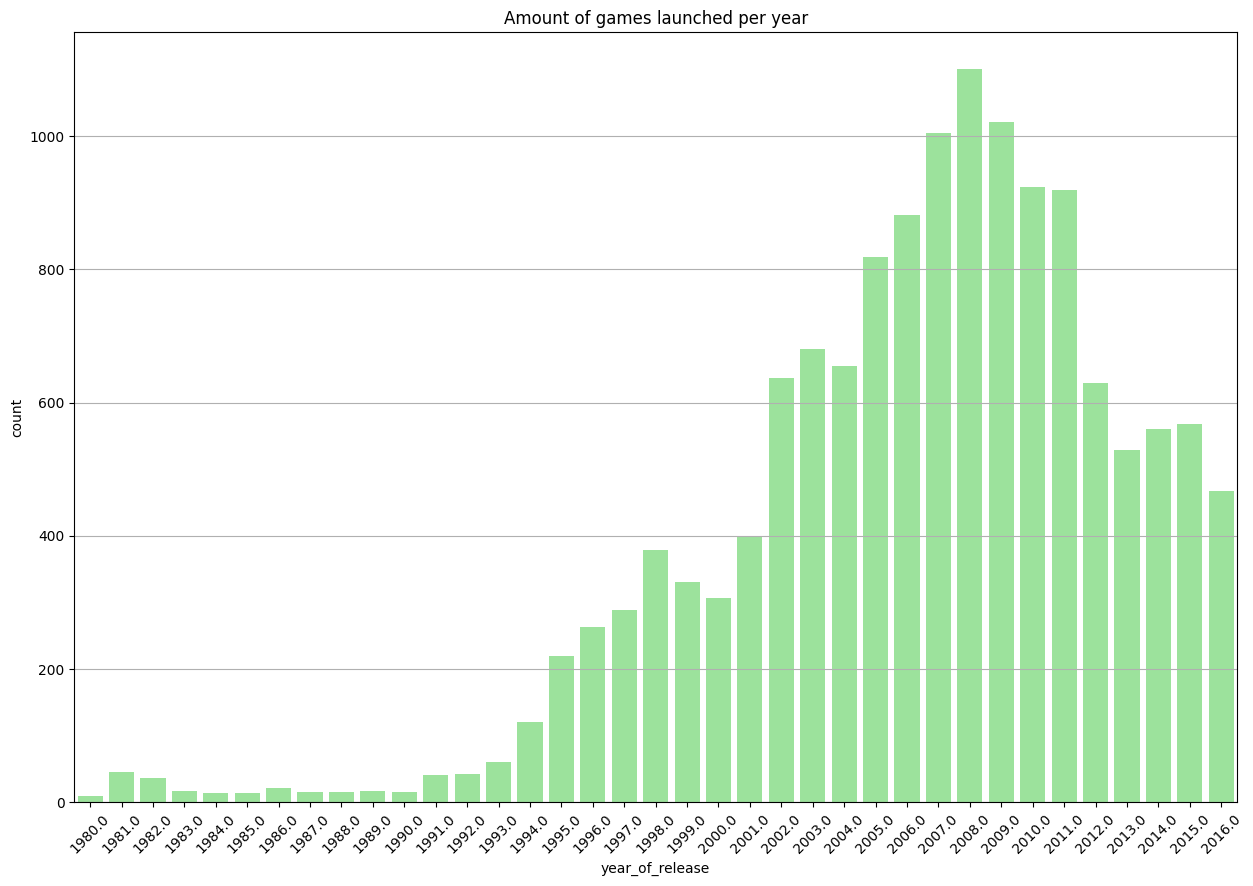

In [176]:
# We create a graph to visualize the number of games launched per year
plt.figure(figsize=(15,10))
sns.countplot(games,x='year_of_release',color='lightgreen')
plt.title('Amount of games launched per year')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

**Observations**

We can see that the amoung of games launched per year has increased since 1980. It reaches its peack at 2008, and after that the amount of games launched per year has ben decreasing. 

## Sales Difference between platforms

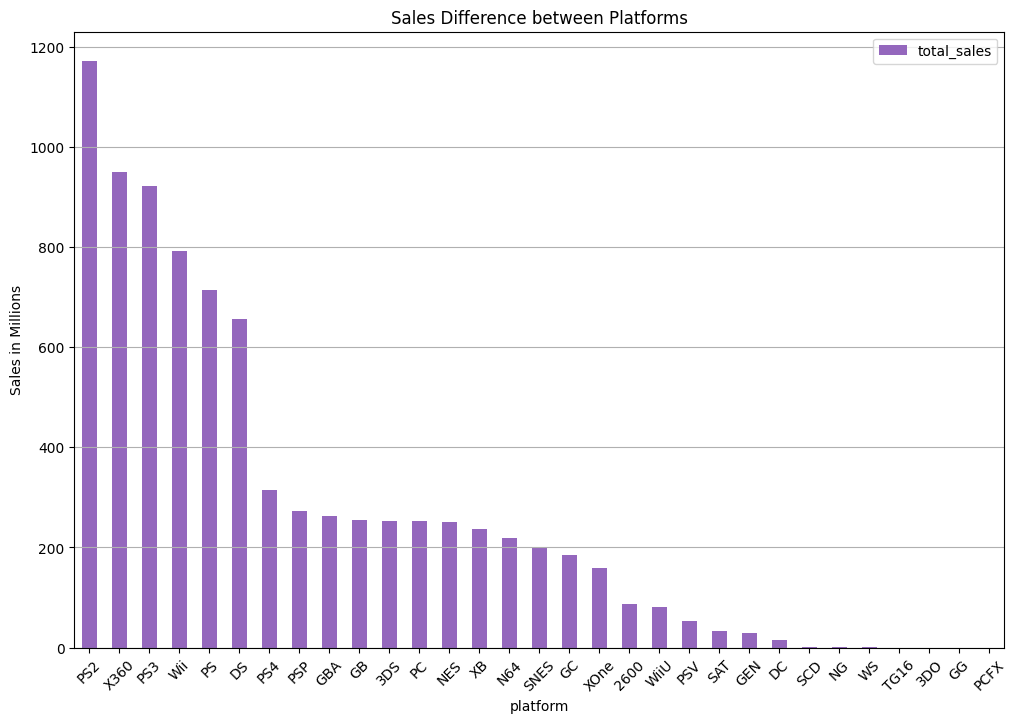

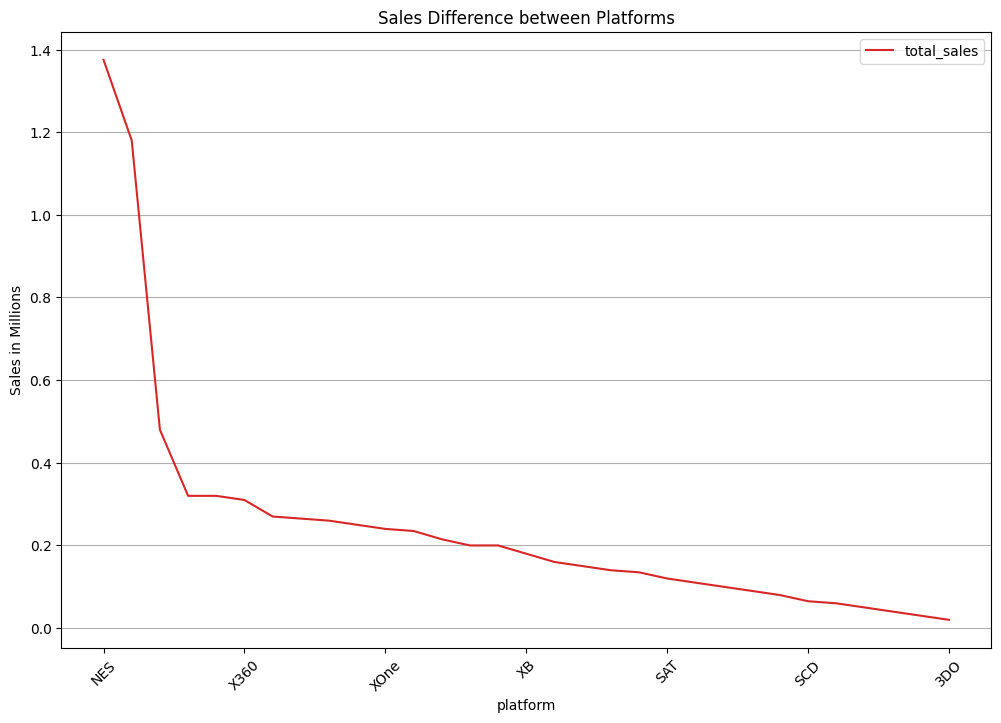

In [233]:
# We create a new columns for total sales per plaform
games['total_sales'] = games.eu_sales + games.jp_sales + games.na_sales + games.other_sales

# We create a bar chart for the sum of total sales
games.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(
    'total_sales',ascending=False).plot(kind='bar',color='tab:purple',figsize=(12,8))
plt.title('Sales Difference between Platforms')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=45)
plt.grid(True,axis='y')

# We create a line chart for the median of total sales per platform
games.pivot_table(index='platform',values='total_sales',aggfunc='median').sort_values(
    'total_sales',ascending=False).plot(kind='line',color='tab:red',figsize=(12,8))
plt.title('Sales Difference between Platforms')
plt.ylabel('Sales in Millions')
plt.grid(True,axis='y')
plt.xticks(rotation=45)
plt.show()

**Observations**
- We see that the platform with the highest total sales is the PS2. 
- The platforms that follow the PS2 are the X360, PS3, Wii, and PS
- We also see that the NES platform has the highest median sales over the years. 

## Time period for further analysis

We will select the last five years to continue with our analsys. We determine that the information for the last 5 years is enough to continue with our analysis and test our hypotesis. 


In [210]:
# We create the new dataset
games_final = games[games['year_of_release'] >= 2011]

## What are the sales lead platforms?

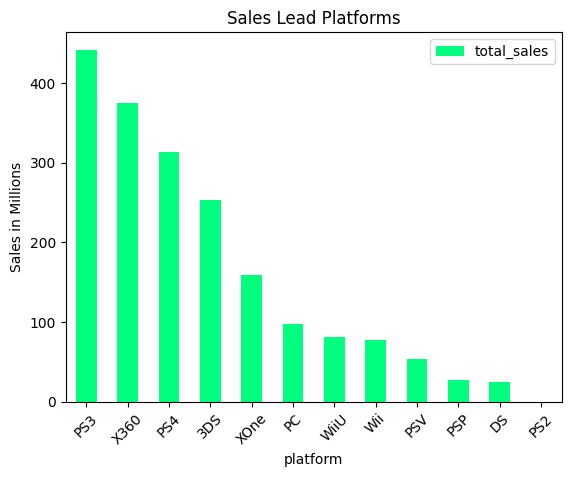

In [234]:
games_final.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).plot(
    kind='bar',color='springgreen'
)
plt.title('Sales Lead Platforms')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=45)
plt.show()

**Observations**

- We can see the difference between total sales since 1980 till today and the last five years. We see that PS2 is nologer the sales lead platform but the PS3. 
- We still have the X360 as the second sales lead platform. 

## Correlation between `critic_score` `user_score` and `sales`

In [224]:
games_final[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.286210,-0.025398
critic_score,0.286210,1.000000,0.403602
user_score,-0.025398,0.403602,1.000000


<Axes: >

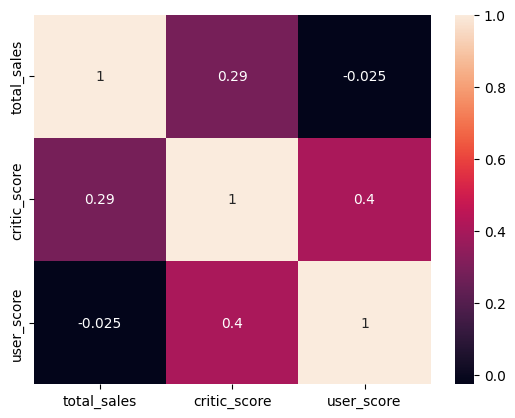

In [226]:
sns.heatmap(games_final[['total_sales','critic_score','user_score']].corr(), annot=True)

**Observations**

- We can see that the correlation between `total_sales` and `critic_score` is of 0.29. This is a postive weak correlation.
- The correlation between `total_sales` and `user_sscore` is of -0.025. Almost no correlation. 
- `critic_score` and `user_sscore` have a correlation of 0.4

## What's the top selling genres?

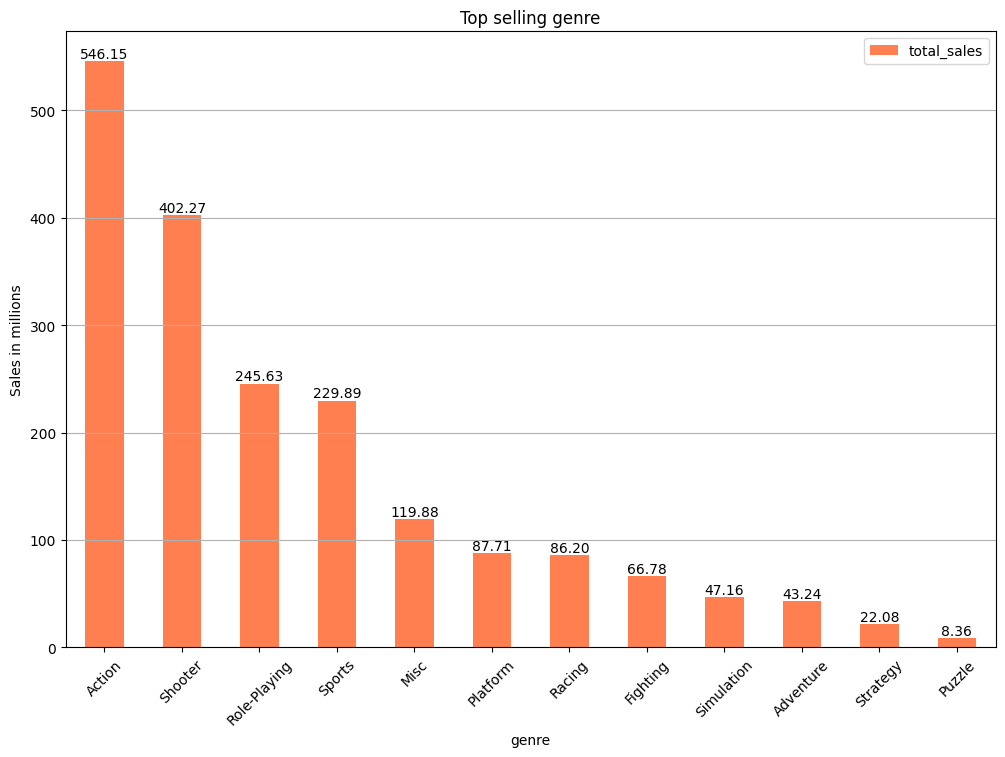

In [235]:
ax = games_final.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).plot(
    kind='bar',color='coral',figsize=(12,8))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Top selling genre')
plt.ylabel('Sales in millions')
plt.grid(True,axis='y')
plt.xticks(rotation=45)
plt.show()

**Observations**

The five top selling genres in the last five years are Action, Shooter, Role-Playing, Sports, and Misc

## What are the top selling platforms per region?

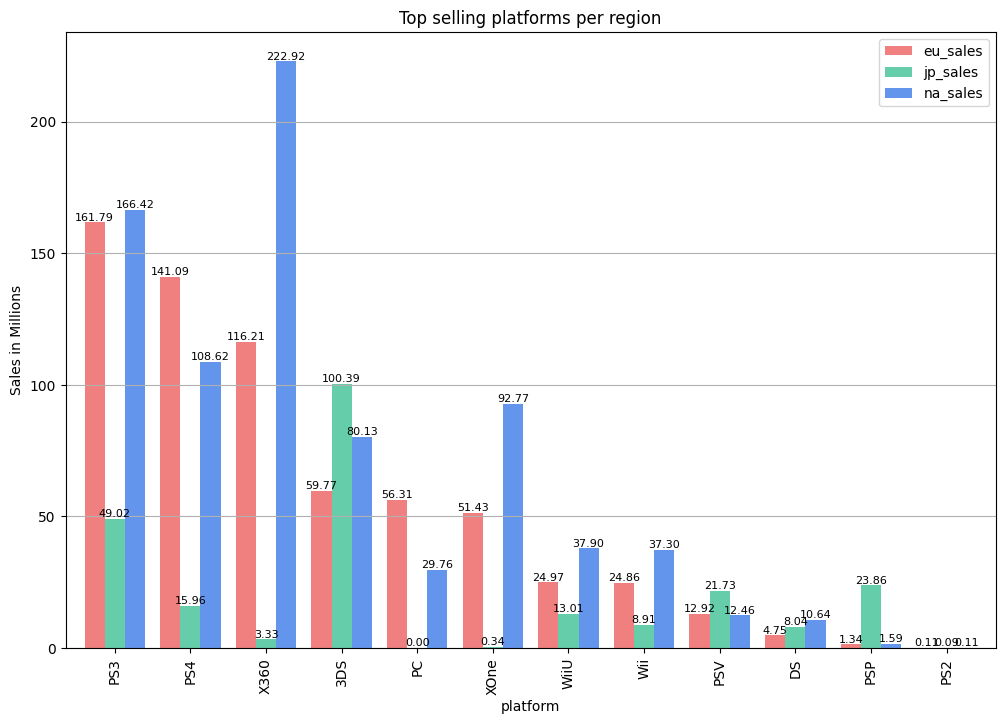

In [252]:
regions = ['eu_sales','na_sales','jp_sales']
ax = games_final.pivot_table(index='platform',values=regions,aggfunc='sum').sort_values(regions,ascending=False).plot(
    kind='bar',figsize=(12,8),width=0.8,color=['lightcoral','mediumaquamarine','cornflowerblue'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)

plt.title('Top selling platforms per region')
plt.ylabel('Sales in Millions')
plt.grid(True,axis='y')
plt.show()


**Observations**
- The five main platforms in Europe are PS3, PS4, X360, 3DS, and PC.
- The five main plarforms in Japan are 3DS, PS3, PSP, PSV, and, PS4.
- The five main platforms in North America are X360, PS3, PS4, XOne, and 3DS.
- We can see that PS3 and PS4 are repeated over the three regions. 

## Main Genre per Region

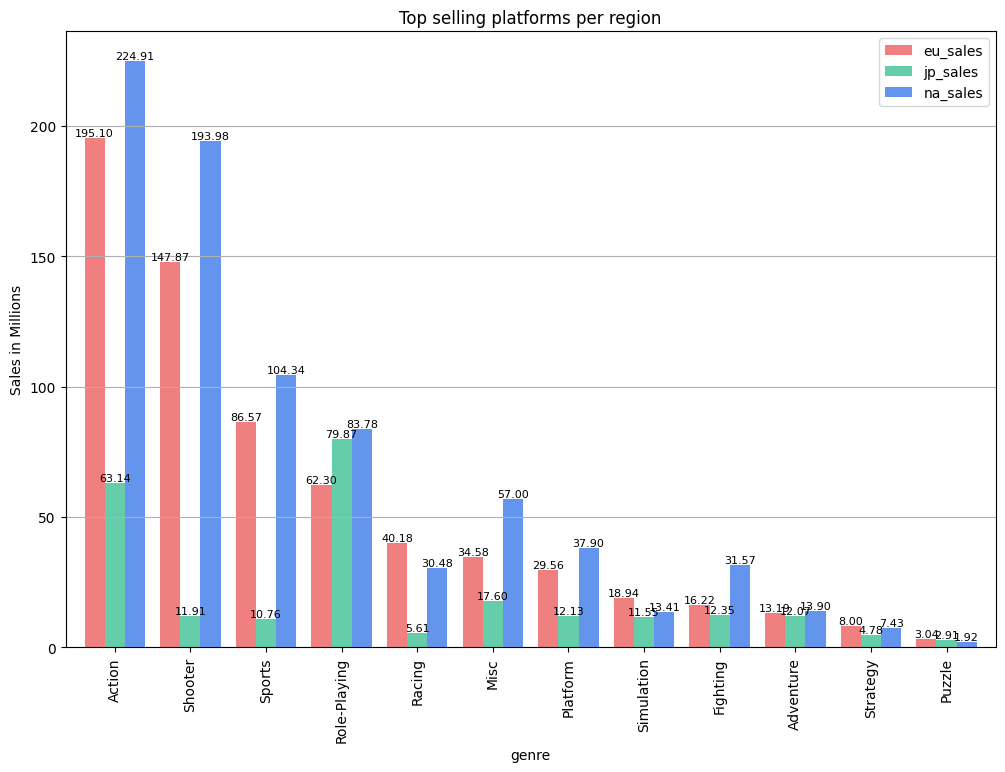

In [253]:
ax = games_final.pivot_table(index='genre',values=regions,aggfunc='sum').sort_values(regions,ascending=False).plot(
    kind='bar',figsize=(12,8),width=0.8,color=['lightcoral','mediumaquamarine','cornflowerblue'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)

plt.title('Top selling platforms per region')
plt.ylabel('Sales in Millions')
plt.grid(True,axis='y')
plt.show()



**Observations**

- The five main genres in Europe are Action, Shooter, Sports, Role-play, and Racing.
- The five main genres in Japan are Role-Play, Action, Misc, fighting, and platform.
- The five main genres in North America are Action, Shooter, Sports, Role-Play, and Misc.
- We can see that action appears on each region as part of the five top genres. 

## Does ESRB rating affect sales in each region?
### Bar Chart

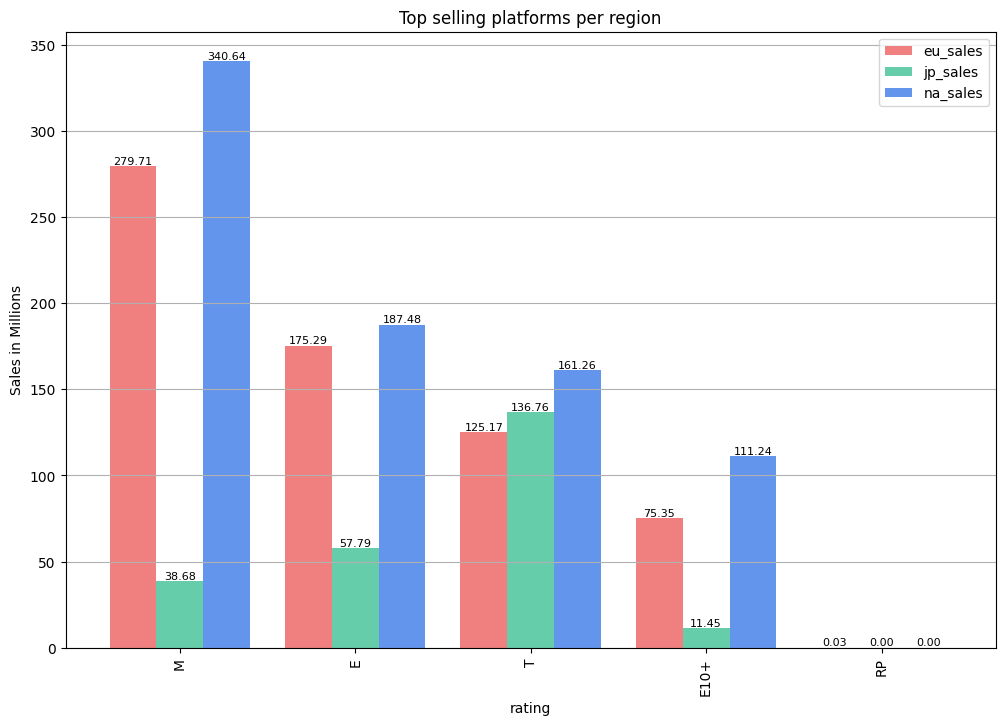

In [254]:
# We create a bar chart
ax = games_final.pivot_table(index='rating',values=regions,aggfunc='sum').sort_values(regions,ascending=False).plot(
    kind='bar',figsize=(12,8),width=0.8,color=['lightcoral','mediumaquamarine','cornflowerblue'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)

plt.title('Top selling platforms per region')
plt.ylabel('Sales in Millions')
plt.grid(True,axis='y')
plt.show()


### Scatterplots

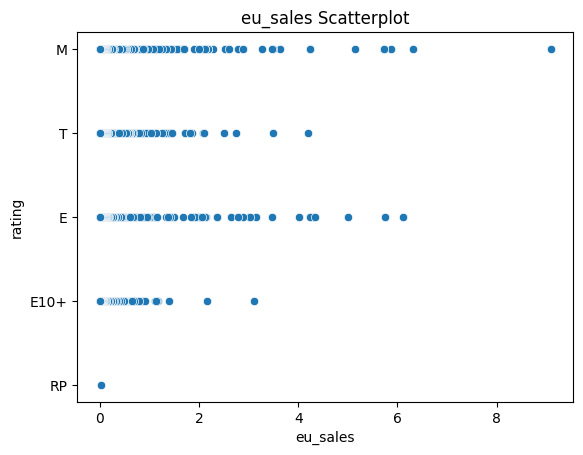

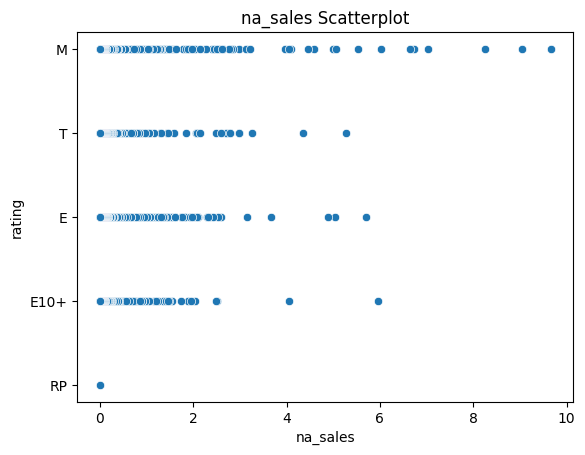

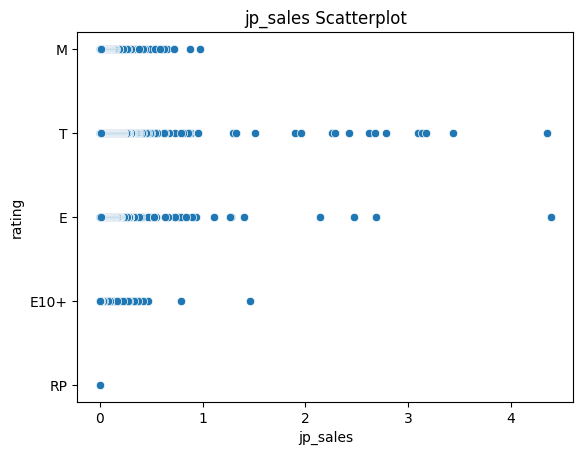

In [258]:
# We create some scatterplots for each region
for region in regions:
    
    sns.scatterplot(games_final,x=region,y='rating')
    plt.title(f'{region} Scatterplot')
    plt.show()

**Observations**
- On our bar chart we see that in North America and Europe the games with higher sales are the ones with M raiting. However this rating is not well sold in Japan.
- The games with higher sales in Japan are T rating. 
- We see that the games with RP raiting have the lower sales on each region. 
- We conlcude the same by looking at our scatterplots. However, we can also see that within each raiting we have games with lower and higher sales. 

With that observations we cannot say that the ESRB affects sales or not. 

# Hypothesis Testing

- Mean user_score for XBOX One and PC are the same
- Mean user_score for Action and Sport genre are different

## Hypothesis One

$H_O$ = Mean `user_score` fro XBox and PC are the same

$H_a$ = Mean `user_score` fro XBox and PC are different

&#945; = 0.05

Reject null hypothesis >> The data is not normally distribute


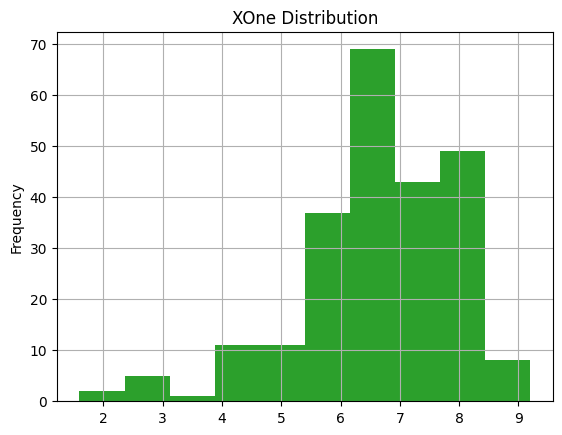

Reject null hypothesis >> The data is not normally distribute


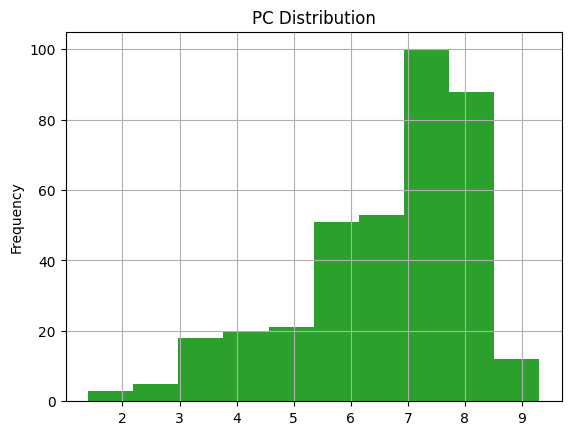

In [265]:
# Shapiro test to check if the variable is normally distributed

platforms = ['XOne','PC']
alpha = 0.05
for platform in platforms:
    stat, p_value = st.shapiro(games_final.query(f"platform == '{platform}'")['user_score'].dropna()) # We use dropna to elimnate missing values 
    if p_value < alpha:
        print('Reject null hypothesis >> The data is not normally distribute')
    else:
        print('Fail to reject null hypothesis >> The data is normally distributed')
    
    # We create a graph to show the distribution
    games_final.query(f"platform == '{platform}'")['user_score'].plot(kind='hist',color='tab:green')
    plt.title(f'{platform} Distribution')
    plt.grid(True)
    plt.show()


Both variables are no normally distributed, therefore, we'll perform a mannwhitneyu test

In [266]:
# We perform the test 
results = st.mannwhitneyu(games_final.query("platform == 'XOne'")['user_score'].dropna(),
                       games_final.query("platform == 'PC'")['user_score'].dropna())
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')  

p-value: 0.24386505352374965
We fail to reject the null hypothesis


As our p_value is greater than our significant level that meas we don't have enough evidence to reject the null hypothesis, theredore we can say that the mean `user_score` fro XBox and PC are the same.

## Hypothesis Two

$H_0$ = Mean `user_score` for Action and Sport genre are the same

$H_a$ = Mean `user_score` for Action and Sport genre are different

&#945; = 0.05  

Reject null hypothesis >> The data is not normally distribute


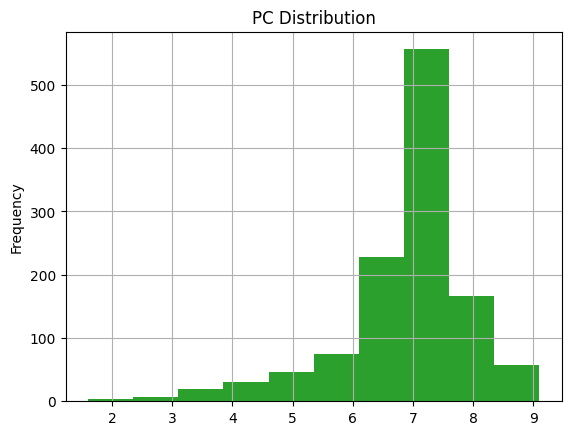

Reject null hypothesis >> The data is not normally distribute


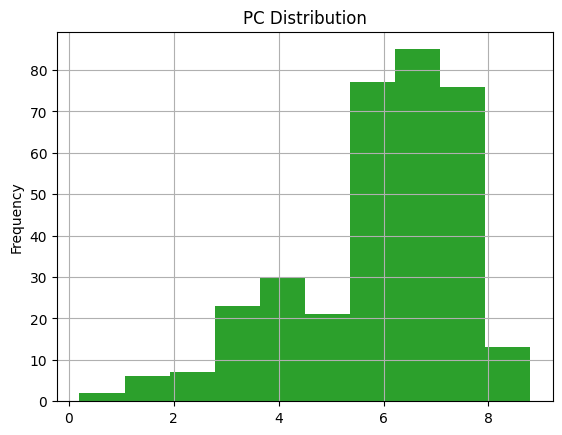

In [269]:
genres = ['Action','Sports']
for genre in genres:
    stat, p_value = st.shapiro(games_final.query(f"genre == '{genre}'")['user_score'].dropna()) # We use dropna to elimnate missing values 
    if p_value < alpha:
        print('Reject null hypothesis >> The data is not normally distribute')
    else:
        print('Fail to reject null hypothesis >> The data is normally distributed')
    
    # We create a graph to show the distribution
    games_final.query(f"genre == '{genre}'")['user_score'].plot(kind='hist',color='tab:green')
    plt.title(f'{platform} Distribution')
    plt.grid(True)
    plt.show()

Both variables are no normally distributed, therefore, we'll perform a mannwhitneyu test

In [270]:
# We perform the test 
results = st.mannwhitneyu(games_final.query("genre == 'Action'")['user_score'].dropna(),
                       games_final.query("genre == 'Sports'")['user_score'].dropna())
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 1.2574695864310787e-32
We reject the null hypothesis


As our p_value is lower than our significance level, we can say that we have enough evidence to reject the null hypothesis, therefore we can say that the mean `user_score` for Action and Sport genre are different.

# General Conclusions

**Data Analysis**

Number of games released per year

The number of games released per year has been increasing since 1980. It peaked around 2008 and has since decreased.

We also saw that sales followed a similar pattern. As the number of games on the market increased, sales per year also increased, and as the number of games per year decreased, so did sales.

**Sales by platform**

The leading platforms in sales are PS2, X360, PS3, Wii, and PS.

**Are differences in sales by platform significant?**

For this part, we decided to only consider years equal to or greater than 2011.

We saw in our boxplot that the differences were not so large. Most sales of the most popular platforms were between 0 and 1 million dollars. However, we see differences in the medians of the sales of each platform. We can see that consoles with the highest medians are X360 and PS4. We also see differences in their upper limits.

**Do user and professional reviews affect platform sales?**

We found that the correlations of scores put by critics do affect game sales in some way. User scores have a very weak relationship.

**Analyzing game sales by genre**

In the last 5 years, action games have been the highest-grossing; followed by sports, shooter, and role-playing games.

In the last three years, shooter games have gained more strength and have managed to sell more. Even surpassing the sales of action games in the last year.

**Top platforms by region**

In North America and Europe, we have the same platforms with the most sales, just in a different order. In North America, we have the X360 as the leading platform, and in Europe, the PS4 as the leading platform.

In Japan, we see more consoles from the Nintendo company as the main ones. Here the main console is the Nintendo 3DS.

We can see that the presence of Sony consoles is important in each region.

**Top genres by region**

The preferred genres by people in North America and Europe are quite similar. Action games are the best-selling in both regions.

In Japan, the best-selling games are role-playing games.

We see that action games are an important part in all three regions.

**Do ESRB ratings affect sales in individual regions?**

Games with M ratings generate the most revenue, followed by E, T, and E10+ ratings.

We could say that the rating does affect game sales.

**Hypothesis Testing**

**First hypothesis**

Since our p-value is greater than our significance level, we can say that we do not have enough evidence to reject the null hypothesis and say that "The average user ratings for the Xbox One and PC platforms are equal."

Second hypothesis

Since our p-value is lower than our significance level, we can say that we do not have enough evidence to reject the null hypothesis and say that "The average user ratings for the Action and Sports genres are different."